In [1]:
# let's play with the spin isochrones from Spada & Lanzafame (2020)
# https://ui.adsabs.harvard.edu/abs/2020A%26A...636A..76S/abstract

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

import matplotlib.pyplot as plt
from scipy import interpolate

In [50]:
df = pd.read_csv('SL20_tblA1.txt')
df.columns


Index(['Mass', 'B_V', 'T0.10', 'T0.12', 'T0.15', 'T0.20', 'T0.22', 'T0.25',
       'T0.30', 'T0.40', 'T0.50', 'T0.60', 'T0.70', 'T1.00', 'T1.50', 'T2.00',
       'T2.50', 'T4.00', 'T4.57'],
      dtype='object')

In [51]:
df.shape

(17, 19)

Text(0, 0.5, 'P (days)')

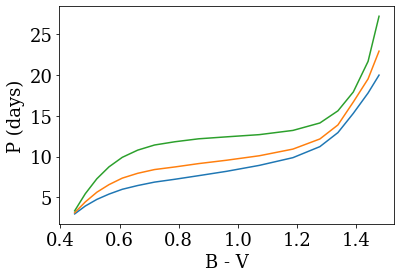

In [15]:
plt.plot(df['B_V'], df['T0.40'])
plt.plot(df['B_V'], df['T0.60'])
plt.plot(df['B_V'], df['T1.00'])
plt.xlabel('B - V')
plt.ylabel("P (days)")

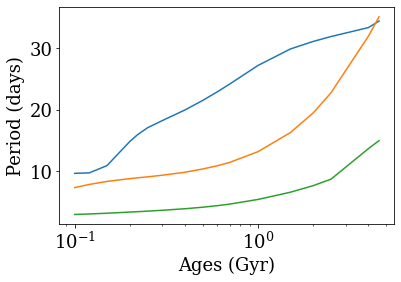

In [43]:
ages = [0.10,0.12,0.15,0.20,0.22,0.25,0.30,0.40,
        0.50,0.60,0.70,1.00,1.50,2.00,2.50,4.00,4.57]
ages = np.array(ages, dtype=np.float)

plt.plot(ages, df.iloc[0, 2:])
plt.plot(ages, df.iloc[5, 2:])
plt.plot(ages, df.iloc[15, 2:])
plt.xlabel('Ages (Gyr)')
plt.ylabel('Period (days)')
plt.xscale('log')

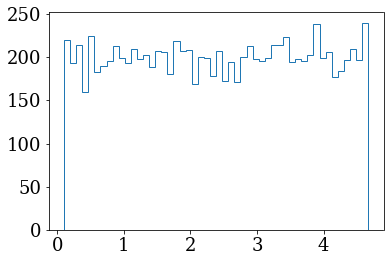

In [213]:
# If we assume ~constant star formation over the past 2 Gyr
# and a roughly uniform mass function (it's NOT, but it makes things easy...)
# -> can we make a quick forward model of what we expect to see in Kepler/K2?

nstars = 10000
age_big = np.random.random(size=nstars) * max(ages) + min(ages)
age_big = np.sort(age_big)
_ = plt.hist(age_big,histtype='step',bins=50)

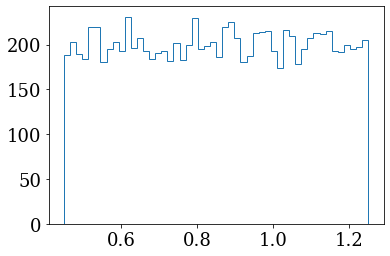

In [214]:
mass_big = np.random.random(size=nstars) * (df['Mass'].max() - df['Mass'].min()) + df['Mass'].min()
mass_big = np.sort(mass_big)
_ = plt.hist(mass_big,histtype='step',bins=50)

In [215]:
z = df.iloc[0:,2:].values
xx, yy = np.meshgrid(ages, df['Mass'].values)
f = interpolate.interp2d(xx.flatten(), yy.flatten(), z.flatten(), kind='linear')

In [216]:
xxnew, yynew = np.meshgrid(age_big, mass_big)

new_rot = f(age_big, mass_big)

In [217]:
print(new_rot.shape, age_big.shape, xxnew.shape)

(10000, 10000) (10000,) (10000, 10000)


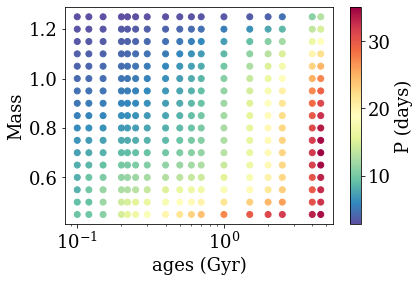

In [218]:
plt.scatter(xx.flatten(), yy.flatten(), c=z.flatten(), cmap=plt.cm.Spectral_r)
plt.xlabel('ages (Gyr)')
plt.ylabel('Mass')
plt.xscale('log')
cb = plt.colorbar()
cb.set_label('P (days)')


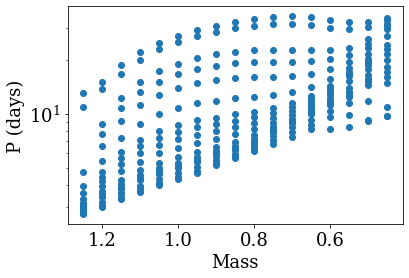

In [219]:
plt.scatter(yy, z)
plt.xlabel('Mass')
plt.ylabel('P (days)')
plt.yscale('log')
# plt.ylim(1,35)
# plt.xlim(0.52, 1.25)
plt.gca().invert_xaxis()

In [222]:
xxnew.flatten().size

100000000

In [223]:
Rind = np.random.choice(xxnew.flatten().size, nstars)

(0.52, 1.25)

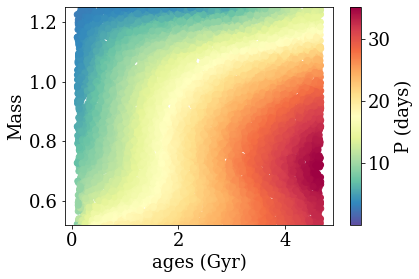

In [229]:
plt.scatter(xxnew.flatten()[Rind], yynew.flatten()[Rind], c=new_rot.flatten()[Rind], cmap=plt.cm.Spectral_r)
plt.xlabel('ages (Gyr)')
plt.ylabel('Mass')
# plt.xscale('log')
cb = plt.colorbar()
cb.set_label('P (days)')
plt.ylim(0.52, 1.25)

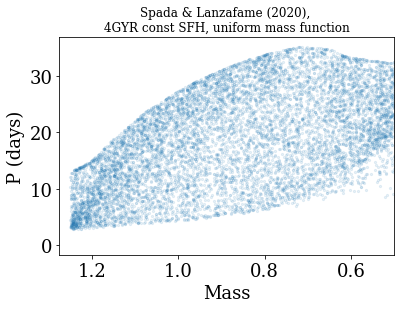

In [244]:
# plt.scatter(yynew, new_rot, alpha=0.15, s=5)
# _ = plt.hist2d(yynew.flatten()[Rind], new_rot.flatten()[Rind], bins=120, cmap=plt.cm.Spectral_r)
plt.scatter(yynew.flatten()[Rind], new_rot.flatten()[Rind], alpha=0.1, s=5)
plt.xlabel('Mass')
plt.ylabel('P (days)')
# plt.yscale('log')
# plt.ylim(3,40)
plt.xlim(0.5, 1.275)
plt.gca().invert_xaxis()
plt.title('Spada & Lanzafame (2020), \n4GYR const SFH, uniform mass function', fontsize=12)

plt.savefig('SL20_test.jpg', dpi=150, bbox_inches='tight', pad_inches=0.25)
